In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### `Linear relation` of mean square Q and mean square Radius Gyration R_g with different N. The number of T can be changed to smaller for debugging

In [2]:
b=3.0
N_list=[10,20,50,100,200,300,400,500,600,700,800,900,1000]
T=10000

In [3]:
Q=[]; Rg=[] 
mQ2_sim = [];mQ2_th = []
mRg2_sim = [];mRg2_th = []

### Creation of polymer chains

In [4]:
for N in N_list:
    print(f"Generating conformations with {N} monomers")
    x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

    for t in range(T):
        
        bx=np.random.uniform(-1,1,10*N)
        by=np.random.uniform(-1,1,10*N)
        bz=np.random.uniform(-1,1,10*N)
        normb=np.sqrt(bx**2+by**2+bz**2)
        
        idb=np.where(normb<=1)[0][0:N]
        bx=bx[idb]/normb[idb]
        by=by[idb]/normb[idb]
        bz=bz[idb]/normb[idb]
        
        vb=b*np.array([bx,by,bz])   
        x[t,1:]=np.cumsum(vb[0])
        y[t,1:]=np.cumsum(vb[1])
        z[t,1:]=np.cumsum(vb[2])

        Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
        Rcm=[np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
        Rg.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2+(y[t,:]-Rcm[1])**2+(z[t,:]-Rcm[2])**2)))
    mQ2_sim.append(np.mean(np.array(Q)**2))
    mRg2_sim.append(np.mean(np.array(Rg)**2))
    mQ2_th.append(N*b**2)
    mRg2_th.append(N*b**2/6)
    if N!=N_list[-1]:
        Q = []; Rg = []

Generating conformations with 10 monomers
Generating conformations with 20 monomers
Generating conformations with 50 monomers
Generating conformations with 100 monomers
Generating conformations with 200 monomers
Generating conformations with 300 monomers
Generating conformations with 400 monomers
Generating conformations with 500 monomers
Generating conformations with 600 monomers
Generating conformations with 700 monomers
Generating conformations with 800 monomers
Generating conformations with 900 monomers
Generating conformations with 1000 monomers


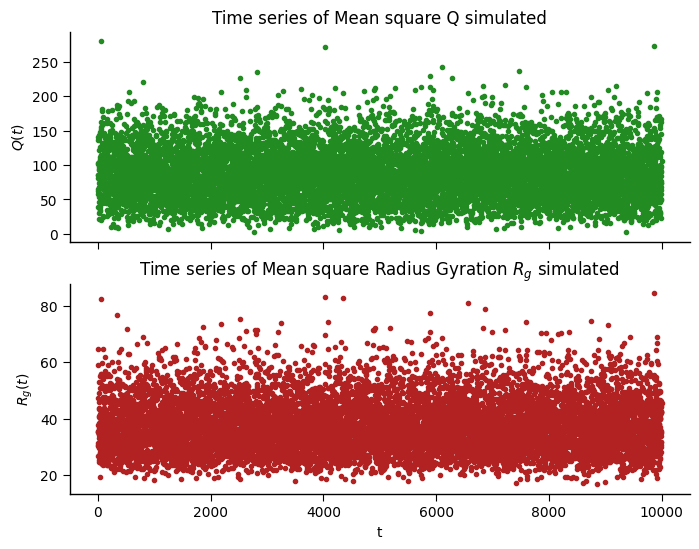

In [5]:
plt.rcParams['figure.figsize']=(8,6)

fig,axs=plt.subplots(2,1,sharex=True)
for ax in axs:
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["top"].set_linewidth(0)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(0)
    ax.grid(False)

# PLOT
axs[0].plot(Q,'.',c='forestgreen',lw=0.5)
axs[1].plot(Rg,'.',c='firebrick',lw=0.5)

# AXES
for ax in axs:
    ax.tick_params(axis='x',length=5)
    ax.tick_params(axis='y',length=5)
axs[1].set_xlabel('t')
axs[0].set_ylabel(r'$Q(t)$')
axs[1].set_ylabel(r'${R_g}(t)$')
axs[0].set_title("Time series of Mean square Q simulated")
axs[1].set_title("Time series of Mean square Radius Gyration ${R_g}$ simulated")
plt.show()

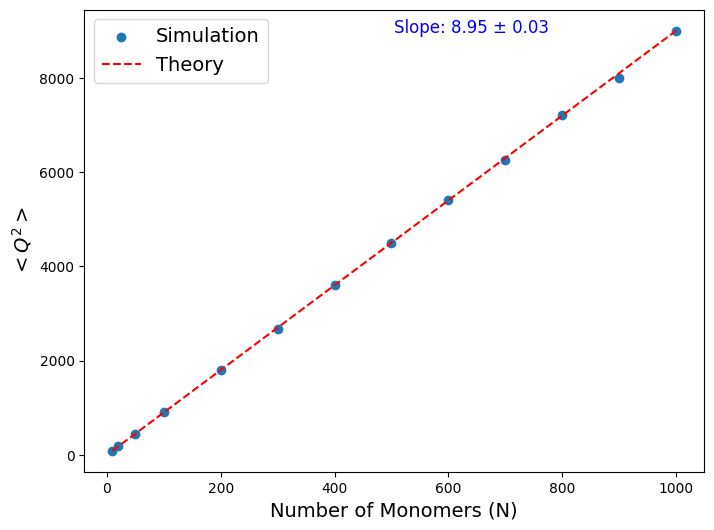

In [6]:
# Scatter plot for simulation
plt.scatter(N_list, mQ2_sim, label='Simulation')

# Line plot for theory
plt.plot(N_list, mQ2_th, color='red', linestyle='--', label='Theory')

# Perform linear regression using scikit-learn
regressor = LinearRegression()
regressor.fit(np.array(N_list).reshape(-1, 1), np.array(mQ2_sim))

# Get the slope and intercept
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Calculate predicted values
line = regressor.predict(np.array(N_list).reshape(-1, 1))

# Calculate mean squared error
mse = mean_squared_error(mQ2_sim, line)

# Get the number of observations and degrees of freedom
n_obs = len(N_list)
dof = n_obs - 2  # degrees of freedom

# Calculate residuals
residuals = mQ2_sim - line.flatten()

# Calculate standard error of the residuals
std_error_residuals = np.sqrt(np.sum(residuals**2) / dof)

# Calculate standard error of the slope
std_error_slope = std_error_residuals / np.sqrt(np.sum((N_list - np.mean(N_list))**2))

# Set fontsize for labels and legend
plt.xlabel('Number of Monomers (N)', fontsize=14)
plt.ylabel(r'$<Q^2>$', fontsize=14)
plt.legend(fontsize=14)

# Display the calculated slope and its error on the plot
plt.text(0.5, 0.95, f'Slope: {slope:.2f} ± {std_error_slope:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.show()


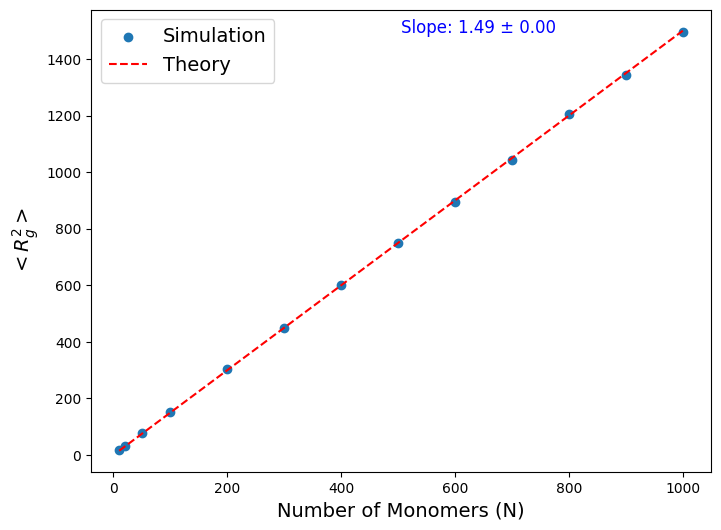

In [7]:
# Scatter plot for simulation
plt.scatter(N_list, mRg2_sim, label='Simulation')

# Line plot for theory
plt.plot(N_list, mRg2_th, color='red', linestyle='--', label='Theory')

# Perform linear regression using scikit-learn
regressor = LinearRegression()
regressor.fit(np.array(N_list).reshape(-1, 1), np.array(mRg2_sim))

# Get the slope and intercept
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Calculate predicted values
line = regressor.predict(np.array(N_list).reshape(-1, 1))

# Calculate mean squared error
mse = mean_squared_error(mRg2_sim, line)

# Get the number of observations and degrees of freedom
n_obs = len(N_list)
dof = n_obs - 2  # degrees of freedom

# Calculate residuals
residuals = mRg2_sim - line.flatten()

# Calculate standard error of the residuals
std_error_residuals = np.sqrt(np.sum(residuals**2) / dof)

# Calculate standard error of the slope
std_error_slope = std_error_residuals / np.sqrt(np.sum((N_list - np.mean(N_list))**2))

plt.xlabel('Number of Monomers (N)', fontsize=14)
plt.ylabel(r'$<R_g^2>$', fontsize=14)
plt.legend(fontsize=14)

plt.text(0.5, 0.95, f'Slope: {slope:.2f} ± {std_error_slope:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.show()


### Influence of `Conformation numbers T`

In [8]:
b=3.0
N=100
T_list=[10,100,1000,10000,100000]

In [9]:
mQ2_sim_2 = []; mRg2_sim_2 = []
Q = []; Rg = []

In [10]:
for T in T_list:
    print(f"Simulating {T} conformations")
    x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

    for t in range(T):
        
        bx=np.random.uniform(-1,1,10*N)
        by=np.random.uniform(-1,1,10*N)
        bz=np.random.uniform(-1,1,10*N)
        normb=np.sqrt(bx**2+by**2+bz**2)
        
        idb=np.where(normb<=1)[0][0:N]
        bx=bx[idb]/normb[idb]
        by=by[idb]/normb[idb]
        bz=bz[idb]/normb[idb]
        
        vb=b*np.array([bx,by,bz])   
        x[t,1:]=np.cumsum(vb[0])
        y[t,1:]=np.cumsum(vb[1])
        z[t,1:]=np.cumsum(vb[2])

        Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
        Rcm=[np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
        Rg.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2+(y[t,:]-Rcm[1])**2+(z[t,:]-Rcm[2])**2)))
    mQ2_sim_2.append(np.mean(np.array(Q)**2))
    mRg2_sim_2.append(np.mean(np.array(Rg)**2))
    Q = []; Rg = []
        # Rcm=[np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
        # Rg.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2+(y[t,:]-Rcm[1])**2+(z[t,:]-Rcm[2])**2)))

Simulating 10 conformations
Simulating 100 conformations
Simulating 1000 conformations
Simulating 10000 conformations
Simulating 100000 conformations


In [11]:
delta_mQ2_sim_2 = []
for mQ2 in mQ2_sim_2:
    delta_mQ2_sim_2.append(np.abs((mQ2-900)/900*100))
delta_mQ2_sim_2

[4.463197246265269,
 4.821349199141486,
 0.18113792974147852,
 0.2714867690573328,
 0.4641852256992757]

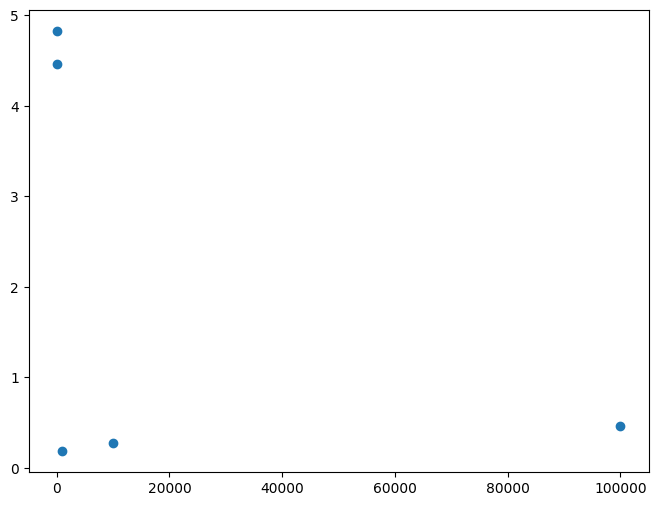

In [12]:
plt.scatter(T_list,delta_mQ2_sim_2)

In [13]:
delta_mRg2_sim_2 = []
for mRg2 in mRg2_sim_2:
    delta_mRg2_sim_2.append(np.abs((mRg2-150)/150*100))
delta_mRg2_sim_2

[4.030345536915888,
 8.759456939213257,
 1.160783485129817,
 0.6198573980377091,
 0.9133809821182883]

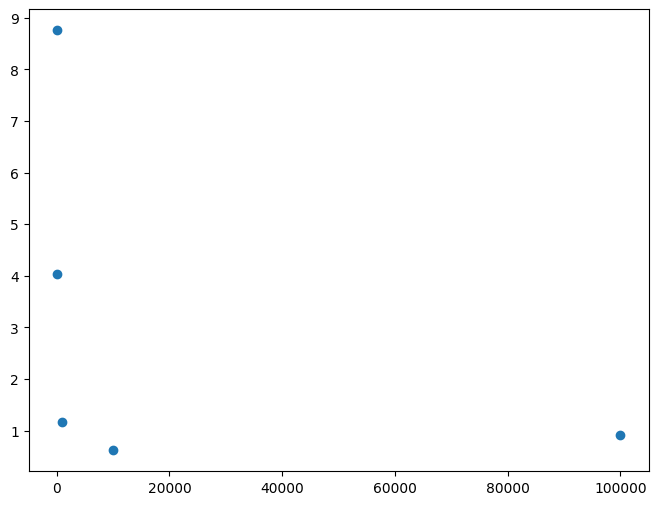

In [14]:
plt.scatter(T_list,delta_mRg2_sim_2)

### `Probability density` P(Q) in cases N = 100 and N = 2

In [15]:
b=3.0
N=100
T=10000
Q= []
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

for t in range(T):
        
        bx=np.random.uniform(-1,1,10*N)
        by=np.random.uniform(-1,1,10*N)
        bz=np.random.uniform(-1,1,10*N)
        normb=np.sqrt(bx**2+by**2+bz**2)
        
        idb=np.where(normb<=1)[0][0:N]
        bx=bx[idb]/normb[idb]
        by=by[idb]/normb[idb]
        bz=bz[idb]/normb[idb]
        
        vb=b*np.array([bx,by,bz])   
        x[t,1:]=np.cumsum(vb[0])
        y[t,1:]=np.cumsum(vb[1])
        z[t,1:]=np.cumsum(vb[2])

        Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))

In [16]:
array_square_Q = np.array(Q)**2

In [17]:
P_theory = 4*np.pi*array_square_Q*(3/(2*np.pi*N*b**2))**1.5*np.exp(-3*array_square_Q/(2*N*b**2))

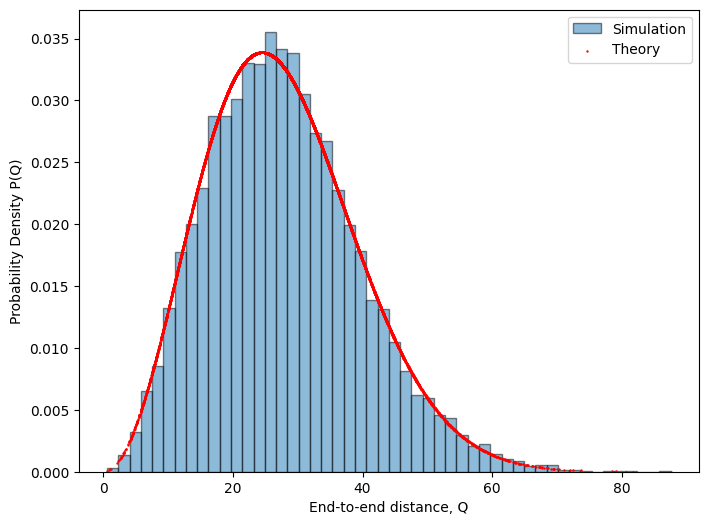

In [18]:
plt.hist(Q, density=True, bins=50, ec='black', alpha=0.5, label = 'Simulation')
plt.scatter(np.array(Q),P_theory,color = 'red', s= 0.5, label='Theory')

plt.xlabel('End-to-end distance, Q')
plt.ylabel('Probability Density P(Q)')
plt.legend()

In [19]:
b=3.0
N=2
T=10000
Q = []

In [20]:
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

for t in range(T):
        
        bx=np.random.uniform(-1,1,10*N)
        by=np.random.uniform(-1,1,10*N)
        bz=np.random.uniform(-1,1,10*N)
        normb=np.sqrt(bx**2+by**2+bz**2)
        
        idb=np.where(normb<=1)[0][0:N]
        bx=bx[idb]/normb[idb]
        by=by[idb]/normb[idb]
        bz=bz[idb]/normb[idb]
        
        vb=b*np.array([bx,by,bz])   
        x[t,1:]=np.cumsum(vb[0])
        y[t,1:]=np.cumsum(vb[1])
        z[t,1:]=np.cumsum(vb[2])

        Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))

In [21]:
array_square_Q = np.array(Q)**2
P_theory = np.array(Q)/(2*b**2)

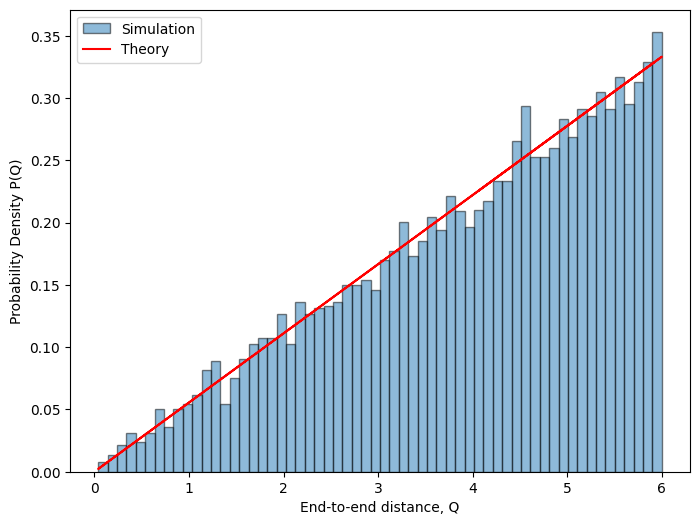

In [22]:
plt.hist(Q, density=True, bins=60, ec='black', alpha=0.5, label = 'Simulation')
plt.plot(np.array(Q),P_theory,color = 'red', label='Theory')

plt.xlabel('End-to-end distance, Q')
plt.ylabel('Probability Density P(Q)')
plt.legend()

### `Intensity of scattering` I(k) and `Guinier Approximation`

#### We define a function for calculating the distance matrix R_ij

In [23]:
def calculate_distance_matrix(x, y, z):
    from scipy.spatial.distance import cdist

    # Combining the coordinates into a single array
    coordinates = np.stack([x, y, z], axis=1)

    # Calculating the distance matrix
    return cdist(coordinates, coordinates)

C:\Users\peter\AppData\Local\Temp\ipykernel_22336\4235959337.py:49: RuntimeWarning: invalid value encountered in true_divide
  I_matrix_t += np.sin(k[i]*distance_matrix)/(k[i]*distance_matrix)


$R_g^2$ found from the linear regression 150.65338947837137
$R_g^2$ calculated from simulation 154.98111065179376


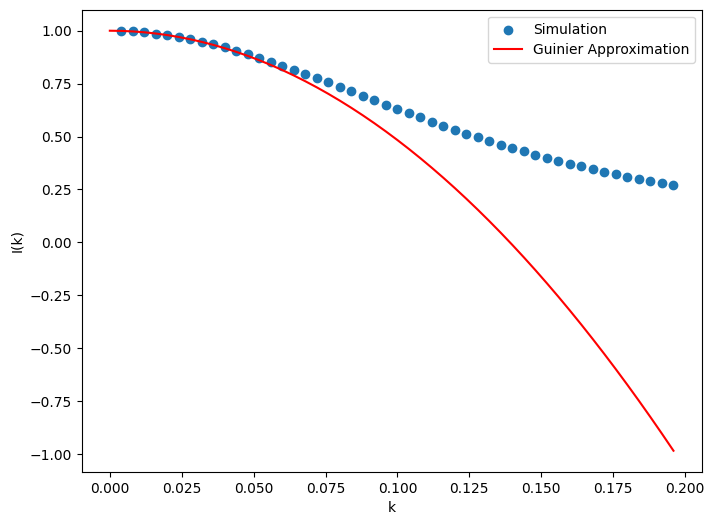

In [24]:
b=3.0
N=100
T=1000
Q = []
Rg = []
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

# Simulate the polymer chains
for t in range(T):
        
        bx=np.random.uniform(-1,1,10*N)
        by=np.random.uniform(-1,1,10*N)
        bz=np.random.uniform(-1,1,10*N)
        normb=np.sqrt(bx**2+by**2+bz**2)
        
        idb=np.where(normb<=1)[0][0:N]
        bx=bx[idb]/normb[idb]
        by=by[idb]/normb[idb]
        bz=bz[idb]/normb[idb]
        
        vb=b*np.array([bx,by,bz])   
        x[t,1:]=np.cumsum(vb[0])
        y[t,1:]=np.cumsum(vb[1])
        z[t,1:]=np.cumsum(vb[2])

        Q.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
        Rcm=[np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
        Rg.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2+(y[t,:]-Rcm[1])**2+(z[t,:]-Rcm[2])**2)))
mRg2_sim=np.mean(np.array(Rg)**2)
k = np.arange(0,0.2,0.004)
k_square = k**2
mRg2_sim=np.mean(np.array(Rg)**2)

# Calculate the Guinier approximation of I

I_approx = (1-(k_square*mRg2_sim)/3)

# Calculate I(k)

I = np.zeros(len(k))

for i in range(len(k)):
    I_matrix_t = np.zeros((N+1,N+1))
    distance_matrix = np.zeros((N+1,N+1))
    I_sum = 0
    for t in range(T):
        if i!=0:
            distance_matrix = calculate_distance_matrix(x[t,:],y[t,:],z[t,:])
            I_matrix_t += np.sin(k[i]*distance_matrix)/(k[i]*distance_matrix)
            for j in range(N+1):
                I_matrix_t[j,j] = 0
    I_sum += np.sum(I_matrix_t)
    number_of_ele = (N+1)**2 - (N+1)
    avg_I_matrix = I_sum/number_of_ele/T
    I[i] = avg_I_matrix

# Plot the I(k) and Guinier approximation
plt.scatter(k[1:],I[1:], label = 'Simulation')
plt.plot(k,I_approx, label = 'Guinier Approximation', color = 'red')
plt.legend()
plt.xlabel('k')
plt.ylabel('I(k)')

k_calculation = np.where(k<0.04)
index_to_choose = np.max(k_calculation)

k_guiner = k[1:index_to_choose]**2
I_sim = I[1:index_to_choose]
I_approx = (1-(k_guiner*mRg2_sim)/3)

slope, intercept = np.polyfit(k_guiner, I_sim, 1)

# print("Slope:", slope)
print("$R_g^2$ found from the linear regression", slope*-3)
print("$R_g^2$ calculated from simulation", mRg2_sim)

### Getting the linear part for the calculation of Radius gyration

$R_g^2$ found from the linear regression 150.65338947837137
$R_g^2$ calculated from simulation 154.98111065179376


Text(0, 0.5, 'I(k)')

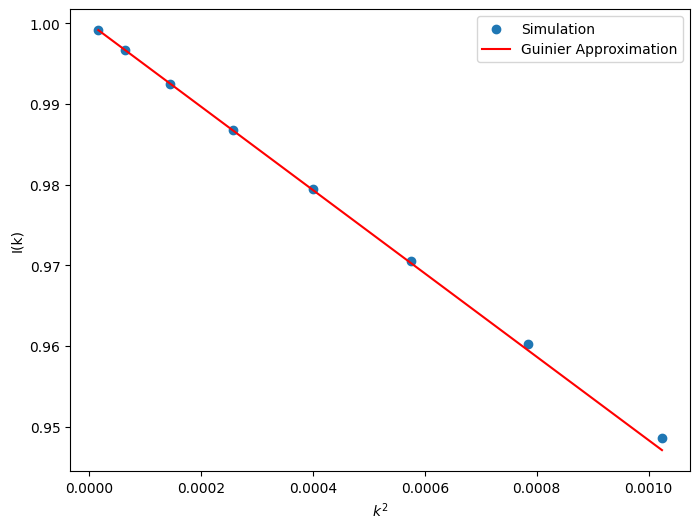

In [25]:
k_calculation = np.where(k<0.04)
index_to_choose = np.max(k_calculation)

k_guiner = k[1:index_to_choose]**2
I_sim = I[1:index_to_choose]
I_approx = (1-(k_guiner*mRg2_sim)/3)

slope, intercept = np.polyfit(k_guiner, I_sim, 1)

# print("Slope:", slope)
print("$R_g^2$ found from the linear regression", slope*-3)
print("$R_g^2$ calculated from simulation", mRg2_sim)

plt.scatter(k_guiner,I_sim, label = 'Simulation')
plt.plot(k_guiner,I_approx, label = 'Guinier Approximation', color = 'red')
plt.legend()
plt.xlabel('$k^2$')
plt.ylabel('I(k)')

### `Monte-Carlo` simulation

### Initiate the parameters, including KbT

In [26]:
b=3.0
N = 100
T=0
Fx = np.zeros(3)
KbT = 0.5
Fx[0] = 10.0
total_steps = 10000

### Function for randomly change one bond and calculate the Qx extenstion 

In [27]:
def modify_bond_vector_and_get_extension(bx, by, bz, b):
    N = len(bx)
    
    random_bond_index = np.random.randint(0, N)

    bx[random_bond_index] += np.random.uniform(-1, 1)
    by[random_bond_index] += np.random.uniform(-1, 1)
    bz[random_bond_index] += np.random.uniform(-1, 1)

    norm = np.sqrt(bx[random_bond_index]**2 + by[random_bond_index]**2 + bz[random_bond_index]**2)
    bx[random_bond_index] /= norm
    by[random_bond_index] /= norm
    bz[random_bond_index] /= norm

    # Compute the new extension
    x = np.cumsum(b * bx)
    extension = x[-1] - x[0]

    return bx, by, bz, extension

### Use the Metropolis MC for rejection/acceptance of the new bond

In [28]:
def compute_extension(bx, by, bz, b):
    x = np.cumsum(b * bx)
    return x[-1] - x[0]

def compute_potential(bx, by, bz, b, force):
    x = np.cumsum(b * bx)
    Q_x = x[-1] - x[0]
    potential = -np.dot(Q_x,force).sum()
    return potential

def metropolis_mc(bx, by, bz, b, KbT, steps, force):
    extension_list = [compute_extension(bx, by, bz, b)]
    
    for _ in range(steps):
        # Copy current configuration
        new_bx, new_by, new_bz = np.copy(bx), np.copy(by), np.copy(bz)

        # Modify one bond vector
        new_bx, new_by, new_bz, new_extension = modify_bond_vector_and_get_extension(new_bx, new_by, new_bz, b)

        current_extension = compute_extension(bx, by, bz, b)
        new_extension = compute_extension(new_bx, new_by, new_bz, b)

        # Compute new and old potential energy
        current_potential = compute_potential(bx, by, bz, b, force)
        new_potential = compute_potential(new_bx, new_by, new_bz, b, force)

        # Compare with Metropolis criterion to make acceptance or rejection
        delta_potential = new_potential - current_potential
        if delta_potential < 0 or (delta_potential>0 and np.random.rand() < np.exp(-delta_potential / KbT)):
            bx, by, bz = new_bx, new_by, new_bz
            extension_list.append(new_extension)
        else:
            extension_list.append(current_extension)

    return extension_list

#### Recreate the polymer chains

In [29]:
x=np.zeros(N+1); y=np.zeros(N+1); z=np.zeros(N+1)

bx=np.random.uniform(-1,1,10*N)
by=np.random.uniform(-1,1,10*N)
bz=np.random.uniform(-1,1,10*N)
normb=np.sqrt(bx**2+by**2+bz**2)
    
idb=np.where(normb<=1)[0][0:N]
bx=bx[idb]/normb[idb]
by=by[idb]/normb[idb]
bz=bz[idb]/normb[idb]
    
vb=b*np.array([bx,by,bz])   
x[1:]=np.cumsum(vb[0])
y[1:]=np.cumsum(vb[1])
z[1:]=np.cumsum(vb[2])

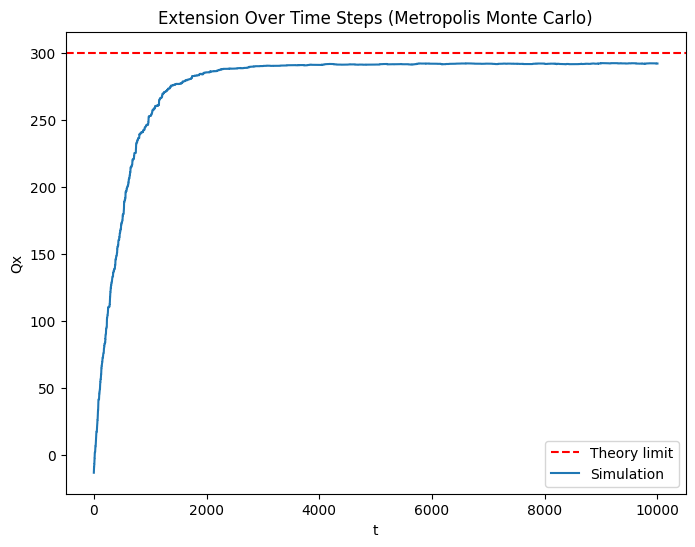

In [30]:
extension_list = metropolis_mc(bx, by, bz, b, KbT, total_steps, Fx)

# Plot extension over time steps
plt.axhline(y=300, color='red', linestyle='--', label='Theory limit')
time_steps = np.arange(total_steps + 1)
plt.plot(time_steps, extension_list, label = 'Simulation')
plt.xlabel('t')
plt.ylabel('Qx')
plt.title('Extension Over Time Steps (Metropolis Monte Carlo)')
plt.legend()
plt.show()

#### Explore the influence of the force with the extension Ratio

In [31]:
Fx_tuned = np.arange(-0.02,10,0.2)
alpha = Fx_tuned*b/KbT
theory = (1/np.tanh(alpha)-1/alpha)

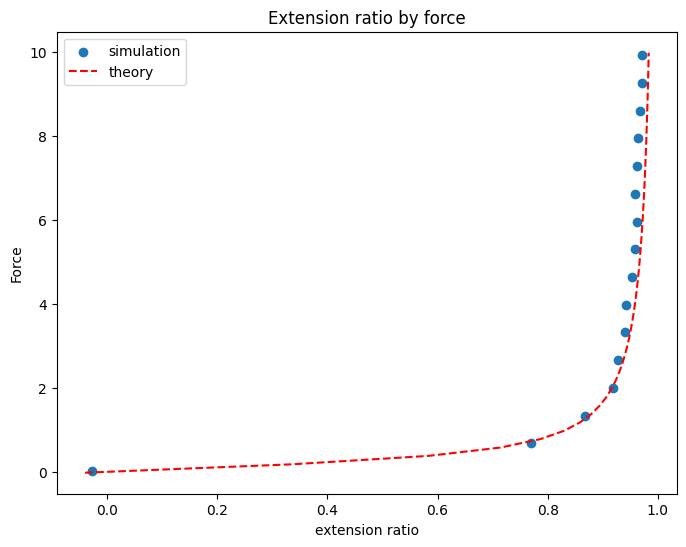

In [32]:
Fx_list = np.arange(0.02,10,0.66)
extension_avg_tail = []
for i in range(len(Fx_list)):
    extension_list = metropolis_mc(bx, by, bz, b, KbT, total_steps, Fx_list[i])
    num_of_tail = 300
    extension_avg = np.average(extension_list[-num_of_tail:])/(N*b)
    extension_avg_tail.append(extension_avg)
x_tuned = np.arange(-0.02,10,0.2)
alpha = Fx_tuned*b/KbT
theory = (1/np.tanh(alpha)-1/alpha)


plt.scatter(extension_avg_tail, Fx_list, label='simulation')  
plt.plot(theory, Fx_tuned, color='red', linestyle='--', label='theory')  
plt.xlabel('extension ratio')
plt.ylabel('Force')
plt.title('Extension ratio by force')

plt.legend()  
plt.show()